In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, LeaveOneOut, cross_val_score
from sklearn.model_selection import cross_val_predict, cross_validate, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, Matern, DotProduct
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from joblib import dump, load
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.manifold import TSNE
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from plotfunc import plot_result, cross_validate_and_plot, plot_learning_curve, plot_with_err

import seaborn as sns

In [2]:
lo = LeaveOneOut()

In [3]:
data = pd.read_csv('data_tc.csv')

In [4]:
columns =  ['Fe', 'Cr', 'Ni', 'Mo',
       'Mn', 'C', 'Ti', 'Si', 'Nb', 'V', 'P', 'B', 'Al', 'N', 'S', 'Co', 'Cu',
       'W', 'As',  'HT stage 1 temperature',
       'HT stage 1 duration', 'HT stage 1 cooling', 'HT stage 2 temperature', 
        'HT stage 2 duration', 'HT stage 2 cooling']
y = data['ND M7C3_D101']

<AxesSubplot: >

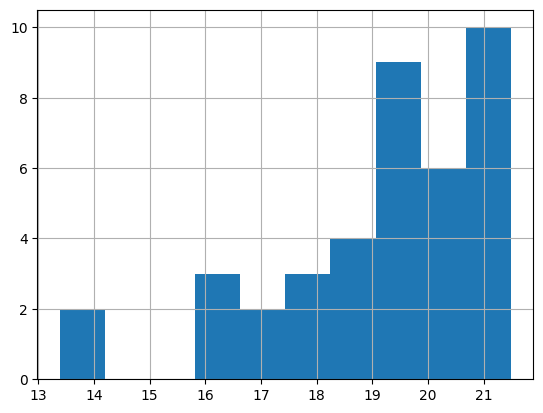

In [5]:
y.hist()

In [6]:
X = np.array(data[columns][y>15])
y = np.array(y[y>15])

# Lasso

In [7]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)

params = {
    'lasso__alpha':np.linspace(1e-5, 1e1, 100)
}

grid = GridSearchCV(pipeline, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 37 folds for each of 100 candidates, totalling 3700 fits
[CV 1/37; 1/100] START lasso__alpha=1e-05.......................................
[CV 1/37; 1/100] END .......lasso__alpha=1e-05;, score=-7.407 total time=   0.0s
[CV 2/37; 1/100] START lasso__alpha=1e-05.......................................
[CV 2/37; 1/100] END .......lasso__alpha=1e-05;, score=-6.256 total time=   0.0s
[CV 3/37; 1/100] START lasso__alpha=1e-05.......................................
[CV 3/37; 1/100] END .......lasso__alpha=1e-05;, score=-0.022 total time=   0.0s
[CV 4/37; 1/100] START lasso__alpha=1e-05.......................................
[CV 4/37; 1/100] END .......lasso__alpha=1e-05;, score=-0.000 total time=   0.0s
[CV 5/37; 1/100] START lasso__alpha=1e-05.......................................
[CV 5/37; 1/100] END .......lasso__alpha=1e-05;, score=-0.006 total time=   0.0s
[CV 6/37; 1/100] START lasso__alpha=1e-05.......................................
[CV 6/37; 1/100] END .......lasso__alpha=1e-

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.855e-01, tolerance: 7.494e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e-01, tolerance: 8.202e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[CV 13/37; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.012 total time=   0.0s
[CV 14/37; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 14/37; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.149 total time=   0.0s
[CV 15/37; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 15/37; 3/100] END lasso__alpha=0.20203000000000002;, score=-14.333 total time=   0.0s
[CV 16/37; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 16/37; 3/100] END lasso__alpha=0.20203000000000002;, score=-10.889 total time=   0.0s
[CV 17/37; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 17/37; 3/100] END lasso__alpha=0.20203000000000002;, score=-0.300 total time=   0.0s
[CV 18/37; 3/100] START lasso__alpha=0.20203000000000002........................
[CV 18/37; 3/100] END lasso__alpha=0.20203000000000002;, score=-1.706 total time=   0.0s
[CV 19/37; 3/100] START lasso__alpha=0.20203000000000002...

[CV 12/37; 6/100] END ....lasso__alpha=0.50506;, score=-0.237 total time=   0.0s
[CV 13/37; 6/100] START lasso__alpha=0.50506....................................
[CV 13/37; 6/100] END ....lasso__alpha=0.50506;, score=-0.027 total time=   0.0s
[CV 14/37; 6/100] START lasso__alpha=0.50506....................................
[CV 14/37; 6/100] END ....lasso__alpha=0.50506;, score=-1.492 total time=   0.0s
[CV 15/37; 6/100] START lasso__alpha=0.50506....................................
[CV 15/37; 6/100] END ....lasso__alpha=0.50506;, score=-5.667 total time=   0.0s
[CV 16/37; 6/100] START lasso__alpha=0.50506....................................
[CV 16/37; 6/100] END ...lasso__alpha=0.50506;, score=-10.978 total time=   0.0s
[CV 17/37; 6/100] START lasso__alpha=0.50506....................................
[CV 17/37; 6/100] END ....lasso__alpha=0.50506;, score=-1.022 total time=   0.0s
[CV 18/37; 6/100] START lasso__alpha=0.50506....................................
[CV 18/37; 6/100] END ....la

[CV 29/37; 8/100] END lasso__alpha=0.7070799999999999;, score=-1.135 total time=   0.0s
[CV 30/37; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 30/37; 8/100] END lasso__alpha=0.7070799999999999;, score=-0.539 total time=   0.0s
[CV 31/37; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 31/37; 8/100] END lasso__alpha=0.7070799999999999;, score=-1.998 total time=   0.0s
[CV 32/37; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 32/37; 8/100] END lasso__alpha=0.7070799999999999;, score=-2.674 total time=   0.0s
[CV 33/37; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 33/37; 8/100] END lasso__alpha=0.7070799999999999;, score=-0.474 total time=   0.0s
[CV 34/37; 8/100] START lasso__alpha=0.7070799999999999.........................
[CV 34/37; 8/100] END lasso__alpha=0.7070799999999999;, score=-4.054 total time=   0.0s
[CV 35/37; 8/100] START lasso__alpha=0.7070799999999999............

[CV 18/37; 11/100] END ...lasso__alpha=1.01011;, score=-4.080 total time=   0.0s
[CV 19/37; 11/100] START lasso__alpha=1.01011...................................
[CV 19/37; 11/100] END ...lasso__alpha=1.01011;, score=-0.341 total time=   0.0s
[CV 20/37; 11/100] START lasso__alpha=1.01011...................................
[CV 20/37; 11/100] END ...lasso__alpha=1.01011;, score=-4.351 total time=   0.0s
[CV 21/37; 11/100] START lasso__alpha=1.01011...................................
[CV 21/37; 11/100] END ...lasso__alpha=1.01011;, score=-3.336 total time=   0.0s
[CV 22/37; 11/100] START lasso__alpha=1.01011...................................
[CV 22/37; 11/100] END ...lasso__alpha=1.01011;, score=-3.014 total time=   0.0s
[CV 23/37; 11/100] START lasso__alpha=1.01011...................................
[CV 23/37; 11/100] END ...lasso__alpha=1.01011;, score=-8.950 total time=   0.0s
[CV 24/37; 11/100] START lasso__alpha=1.01011...................................
[CV 24/37; 11/100] END ...la

[CV 26/37; 13/100] END lasso__alpha=1.2121300000000002;, score=-0.701 total time=   0.0s
[CV 27/37; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 27/37; 13/100] END lasso__alpha=1.2121300000000002;, score=-1.633 total time=   0.0s
[CV 28/37; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 28/37; 13/100] END lasso__alpha=1.2121300000000002;, score=-1.364 total time=   0.0s
[CV 29/37; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 29/37; 13/100] END lasso__alpha=1.2121300000000002;, score=-1.347 total time=   0.0s
[CV 30/37; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 30/37; 13/100] END lasso__alpha=1.2121300000000002;, score=-0.673 total time=   0.0s
[CV 31/37; 13/100] START lasso__alpha=1.2121300000000002........................
[CV 31/37; 13/100] END lasso__alpha=1.2121300000000002;, score=-2.095 total time=   0.0s
[CV 32/37; 13/100] START lasso__alpha=1.2121300000000002.....

[CV 28/37; 15/100] END ...lasso__alpha=1.41415;, score=-1.364 total time=   0.0s
[CV 29/37; 15/100] START lasso__alpha=1.41415...................................
[CV 29/37; 15/100] END ...lasso__alpha=1.41415;, score=-1.347 total time=   0.0s
[CV 30/37; 15/100] START lasso__alpha=1.41415...................................
[CV 30/37; 15/100] END ...lasso__alpha=1.41415;, score=-0.673 total time=   0.0s
[CV 31/37; 15/100] START lasso__alpha=1.41415...................................
[CV 31/37; 15/100] END ...lasso__alpha=1.41415;, score=-2.095 total time=   0.0s
[CV 32/37; 15/100] START lasso__alpha=1.41415...................................
[CV 32/37; 15/100] END ...lasso__alpha=1.41415;, score=-3.116 total time=   0.0s
[CV 33/37; 15/100] START lasso__alpha=1.41415...................................
[CV 33/37; 15/100] END ...lasso__alpha=1.41415;, score=-0.341 total time=   0.0s
[CV 34/37; 15/100] START lasso__alpha=1.41415...................................
[CV 34/37; 15/100] END ...la

[CV 14/37; 18/100] END lasso__alpha=1.7171800000000002;, score=-2.095 total time=   0.0s
[CV 15/37; 18/100] START lasso__alpha=1.7171800000000002........................
[CV 15/37; 18/100] END lasso__alpha=1.7171800000000002;, score=-0.817 total time=   0.0s
[CV 16/37; 18/100] START lasso__alpha=1.7171800000000002........................
[CV 16/37; 18/100] END lasso__alpha=1.7171800000000002;, score=-9.932 total time=   0.0s
[CV 17/37; 18/100] START lasso__alpha=1.7171800000000002........................
[CV 17/37; 18/100] END lasso__alpha=1.7171800000000002;, score=-3.116 total time=   0.0s
[CV 18/37; 18/100] START lasso__alpha=1.7171800000000002........................
[CV 18/37; 18/100] END lasso__alpha=1.7171800000000002;, score=-4.080 total time=   0.0s
[CV 19/37; 18/100] START lasso__alpha=1.7171800000000002........................
[CV 19/37; 18/100] END lasso__alpha=1.7171800000000002;, score=-0.341 total time=   0.0s
[CV 20/37; 18/100] START lasso__alpha=1.7171800000000002.....

[CV 4/37; 21/100] END ....lasso__alpha=2.02021;, score=-0.099 total time=   0.0s
[CV 5/37; 21/100] START lasso__alpha=2.02021....................................
[CV 5/37; 21/100] END ....lasso__alpha=2.02021;, score=-0.252 total time=   0.0s
[CV 6/37; 21/100] START lasso__alpha=2.02021....................................
[CV 6/37; 21/100] END ....lasso__alpha=2.02021;, score=-0.038 total time=   0.0s
[CV 7/37; 21/100] START lasso__alpha=2.02021....................................
[CV 7/37; 21/100] END ....lasso__alpha=2.02021;, score=-0.530 total time=   0.0s
[CV 8/37; 21/100] START lasso__alpha=2.02021....................................
[CV 8/37; 21/100] END ....lasso__alpha=2.02021;, score=-2.961 total time=   0.0s
[CV 9/37; 21/100] START lasso__alpha=2.02021....................................
[CV 9/37; 21/100] END ....lasso__alpha=2.02021;, score=-0.057 total time=   0.0s
[CV 10/37; 21/100] START lasso__alpha=2.02021...................................
[CV 10/37; 21/100] END ...la

[CV 7/37; 23/100] END ....lasso__alpha=2.22223;, score=-0.530 total time=   0.0s
[CV 8/37; 23/100] START lasso__alpha=2.22223....................................
[CV 8/37; 23/100] END ....lasso__alpha=2.22223;, score=-2.961 total time=   0.0s
[CV 9/37; 23/100] START lasso__alpha=2.22223....................................
[CV 9/37; 23/100] END ....lasso__alpha=2.22223;, score=-0.057 total time=   0.0s
[CV 10/37; 23/100] START lasso__alpha=2.22223...................................
[CV 10/37; 23/100] END ...lasso__alpha=2.22223;, score=-0.011 total time=   0.0s
[CV 11/37; 23/100] START lasso__alpha=2.22223...................................
[CV 11/37; 23/100] END ...lasso__alpha=2.22223;, score=-0.025 total time=   0.0s
[CV 12/37; 23/100] START lasso__alpha=2.22223...................................
[CV 12/37; 23/100] END ...lasso__alpha=2.22223;, score=-0.095 total time=   0.0s
[CV 13/37; 23/100] START lasso__alpha=2.22223...................................
[CV 13/37; 23/100] END ...la

[CV 19/37; 25/100] END lasso__alpha=2.4242500000000002;, score=-0.341 total time=   0.0s
[CV 20/37; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 20/37; 25/100] END lasso__alpha=2.4242500000000002;, score=-4.351 total time=   0.0s
[CV 21/37; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 21/37; 25/100] END lasso__alpha=2.4242500000000002;, score=-3.336 total time=   0.0s
[CV 22/37; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 22/37; 25/100] END lasso__alpha=2.4242500000000002;, score=-3.014 total time=   0.0s
[CV 23/37; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 23/37; 25/100] END lasso__alpha=2.4242500000000002;, score=-8.950 total time=   0.0s
[CV 24/37; 25/100] START lasso__alpha=2.4242500000000002........................
[CV 24/37; 25/100] END lasso__alpha=2.4242500000000002;, score=-4.380 total time=   0.0s
[CV 25/37; 25/100] START lasso__alpha=2.4242500000000002.....

[CV 21/37; 28/100] END ...lasso__alpha=2.72728;, score=-3.336 total time=   0.0s
[CV 22/37; 28/100] START lasso__alpha=2.72728...................................
[CV 22/37; 28/100] END ...lasso__alpha=2.72728;, score=-3.014 total time=   0.0s
[CV 23/37; 28/100] START lasso__alpha=2.72728...................................
[CV 23/37; 28/100] END ...lasso__alpha=2.72728;, score=-8.950 total time=   0.0s
[CV 24/37; 28/100] START lasso__alpha=2.72728...................................
[CV 24/37; 28/100] END ...lasso__alpha=2.72728;, score=-4.380 total time=   0.0s
[CV 25/37; 28/100] START lasso__alpha=2.72728...................................
[CV 25/37; 28/100] END ...lasso__alpha=2.72728;, score=-2.606 total time=   0.0s
[CV 26/37; 28/100] START lasso__alpha=2.72728...................................
[CV 26/37; 28/100] END ...lasso__alpha=2.72728;, score=-0.701 total time=   0.0s
[CV 27/37; 28/100] START lasso__alpha=2.72728...................................
[CV 27/37; 28/100] END ...la

[CV 12/37; 31/100] END ...lasso__alpha=3.03031;, score=-0.095 total time=   0.0s
[CV 13/37; 31/100] START lasso__alpha=3.03031...................................
[CV 13/37; 31/100] END ...lasso__alpha=3.03031;, score=-0.000 total time=   0.0s
[CV 14/37; 31/100] START lasso__alpha=3.03031...................................
[CV 14/37; 31/100] END ...lasso__alpha=3.03031;, score=-2.095 total time=   0.0s
[CV 15/37; 31/100] START lasso__alpha=3.03031...................................
[CV 15/37; 31/100] END ...lasso__alpha=3.03031;, score=-0.817 total time=   0.0s
[CV 16/37; 31/100] START lasso__alpha=3.03031...................................
[CV 16/37; 31/100] END ...lasso__alpha=3.03031;, score=-9.932 total time=   0.0s
[CV 17/37; 31/100] START lasso__alpha=3.03031...................................
[CV 17/37; 31/100] END ...lasso__alpha=3.03031;, score=-3.116 total time=   0.0s
[CV 18/37; 31/100] START lasso__alpha=3.03031...................................
[CV 18/37; 31/100] END ...la

[CV 37/37; 34/100] END ...lasso__alpha=3.33334;, score=-0.673 total time=   0.0s
[CV 1/37; 35/100] START lasso__alpha=3.4343500000000002.........................
[CV 1/37; 35/100] END lasso__alpha=3.4343500000000002;, score=-7.298 total time=   0.0s
[CV 2/37; 35/100] START lasso__alpha=3.4343500000000002.........................
[CV 2/37; 35/100] END lasso__alpha=3.4343500000000002;, score=-0.015 total time=   0.0s
[CV 3/37; 35/100] START lasso__alpha=3.4343500000000002.........................
[CV 3/37; 35/100] END lasso__alpha=3.4343500000000002;, score=-0.004 total time=   0.0s
[CV 4/37; 35/100] START lasso__alpha=3.4343500000000002.........................
[CV 4/37; 35/100] END lasso__alpha=3.4343500000000002;, score=-0.099 total time=   0.0s
[CV 5/37; 35/100] START lasso__alpha=3.4343500000000002.........................
[CV 5/37; 35/100] END lasso__alpha=3.4343500000000002;, score=-0.252 total time=   0.0s
[CV 6/37; 35/100] START lasso__alpha=3.4343500000000002...................

[CV 32/37; 37/100] END lasso__alpha=3.6363700000000003;, score=-3.116 total time=   0.0s
[CV 33/37; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 33/37; 37/100] END lasso__alpha=3.6363700000000003;, score=-0.341 total time=   0.0s
[CV 34/37; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 34/37; 37/100] END lasso__alpha=3.6363700000000003;, score=-4.351 total time=   0.0s
[CV 35/37; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 35/37; 37/100] END lasso__alpha=3.6363700000000003;, score=-3.014 total time=   0.0s
[CV 36/37; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 36/37; 37/100] END lasso__alpha=3.6363700000000003;, score=-8.950 total time=   0.0s
[CV 37/37; 37/100] START lasso__alpha=3.6363700000000003........................
[CV 37/37; 37/100] END lasso__alpha=3.6363700000000003;, score=-0.673 total time=   0.0s
[CV 1/37; 38/100] START lasso__alpha=3.7373800000000004......

[CV 8/37; 41/100] END ....lasso__alpha=4.04041;, score=-2.961 total time=   0.0s
[CV 9/37; 41/100] START lasso__alpha=4.04041....................................
[CV 9/37; 41/100] END ....lasso__alpha=4.04041;, score=-0.057 total time=   0.0s
[CV 10/37; 41/100] START lasso__alpha=4.04041...................................
[CV 10/37; 41/100] END ...lasso__alpha=4.04041;, score=-0.011 total time=   0.0s
[CV 11/37; 41/100] START lasso__alpha=4.04041...................................
[CV 11/37; 41/100] END ...lasso__alpha=4.04041;, score=-0.025 total time=   0.0s
[CV 12/37; 41/100] START lasso__alpha=4.04041...................................
[CV 12/37; 41/100] END ...lasso__alpha=4.04041;, score=-0.095 total time=   0.0s
[CV 13/37; 41/100] START lasso__alpha=4.04041...................................
[CV 13/37; 41/100] END ...lasso__alpha=4.04041;, score=-0.000 total time=   0.0s
[CV 14/37; 41/100] START lasso__alpha=4.04041...................................
[CV 14/37; 41/100] END ...la

[CV 15/37; 43/100] END ...lasso__alpha=4.24243;, score=-0.817 total time=   0.0s
[CV 16/37; 43/100] START lasso__alpha=4.24243...................................
[CV 16/37; 43/100] END ...lasso__alpha=4.24243;, score=-9.932 total time=   0.0s
[CV 17/37; 43/100] START lasso__alpha=4.24243...................................
[CV 17/37; 43/100] END ...lasso__alpha=4.24243;, score=-3.116 total time=   0.0s
[CV 18/37; 43/100] START lasso__alpha=4.24243...................................
[CV 18/37; 43/100] END ...lasso__alpha=4.24243;, score=-4.080 total time=   0.0s
[CV 19/37; 43/100] START lasso__alpha=4.24243...................................
[CV 19/37; 43/100] END ...lasso__alpha=4.24243;, score=-0.341 total time=   0.0s
[CV 20/37; 43/100] START lasso__alpha=4.24243...................................
[CV 20/37; 43/100] END ...lasso__alpha=4.24243;, score=-4.351 total time=   0.0s
[CV 21/37; 43/100] START lasso__alpha=4.24243...................................
[CV 21/37; 43/100] END ...la

[CV 32/37; 45/100] END ...lasso__alpha=4.44445;, score=-3.116 total time=   0.0s
[CV 33/37; 45/100] START lasso__alpha=4.44445...................................
[CV 33/37; 45/100] END ...lasso__alpha=4.44445;, score=-0.341 total time=   0.0s
[CV 34/37; 45/100] START lasso__alpha=4.44445...................................
[CV 34/37; 45/100] END ...lasso__alpha=4.44445;, score=-4.351 total time=   0.0s
[CV 35/37; 45/100] START lasso__alpha=4.44445...................................
[CV 35/37; 45/100] END ...lasso__alpha=4.44445;, score=-3.014 total time=   0.0s
[CV 36/37; 45/100] START lasso__alpha=4.44445...................................
[CV 36/37; 45/100] END ...lasso__alpha=4.44445;, score=-8.950 total time=   0.0s
[CV 37/37; 45/100] START lasso__alpha=4.44445...................................
[CV 37/37; 45/100] END ...lasso__alpha=4.44445;, score=-0.673 total time=   0.0s
[CV 1/37; 46/100] START lasso__alpha=4.545459999999999..........................
[CV 1/37; 46/100] END lasso_

[CV 27/37; 47/100] END ...lasso__alpha=4.64647;, score=-1.633 total time=   0.0s
[CV 28/37; 47/100] START lasso__alpha=4.64647...................................
[CV 28/37; 47/100] END ...lasso__alpha=4.64647;, score=-1.364 total time=   0.0s
[CV 29/37; 47/100] START lasso__alpha=4.64647...................................
[CV 29/37; 47/100] END ...lasso__alpha=4.64647;, score=-1.347 total time=   0.0s
[CV 30/37; 47/100] START lasso__alpha=4.64647...................................
[CV 30/37; 47/100] END ...lasso__alpha=4.64647;, score=-0.673 total time=   0.0s
[CV 31/37; 47/100] START lasso__alpha=4.64647...................................
[CV 31/37; 47/100] END ...lasso__alpha=4.64647;, score=-2.095 total time=   0.0s
[CV 32/37; 47/100] START lasso__alpha=4.64647...................................
[CV 32/37; 47/100] END ...lasso__alpha=4.64647;, score=-3.116 total time=   0.0s
[CV 33/37; 47/100] START lasso__alpha=4.64647...................................
[CV 33/37; 47/100] END ...la

[CV 27/37; 50/100] END ....lasso__alpha=4.9495;, score=-1.633 total time=   0.0s
[CV 28/37; 50/100] START lasso__alpha=4.9495....................................
[CV 28/37; 50/100] END ....lasso__alpha=4.9495;, score=-1.364 total time=   0.0s
[CV 29/37; 50/100] START lasso__alpha=4.9495....................................
[CV 29/37; 50/100] END ....lasso__alpha=4.9495;, score=-1.347 total time=   0.0s
[CV 30/37; 50/100] START lasso__alpha=4.9495....................................
[CV 30/37; 50/100] END ....lasso__alpha=4.9495;, score=-0.673 total time=   0.0s
[CV 31/37; 50/100] START lasso__alpha=4.9495....................................
[CV 31/37; 50/100] END ....lasso__alpha=4.9495;, score=-2.095 total time=   0.0s
[CV 32/37; 50/100] START lasso__alpha=4.9495....................................
[CV 32/37; 50/100] END ....lasso__alpha=4.9495;, score=-3.116 total time=   0.0s
[CV 33/37; 50/100] START lasso__alpha=4.9495....................................
[CV 33/37; 50/100] END ....l

[CV 7/37; 53/100] END ....lasso__alpha=5.25253;, score=-0.530 total time=   0.0s
[CV 8/37; 53/100] START lasso__alpha=5.25253....................................
[CV 8/37; 53/100] END ....lasso__alpha=5.25253;, score=-2.961 total time=   0.0s
[CV 9/37; 53/100] START lasso__alpha=5.25253....................................
[CV 9/37; 53/100] END ....lasso__alpha=5.25253;, score=-0.057 total time=   0.0s
[CV 10/37; 53/100] START lasso__alpha=5.25253...................................
[CV 10/37; 53/100] END ...lasso__alpha=5.25253;, score=-0.011 total time=   0.0s
[CV 11/37; 53/100] START lasso__alpha=5.25253...................................
[CV 11/37; 53/100] END ...lasso__alpha=5.25253;, score=-0.025 total time=   0.0s
[CV 12/37; 53/100] START lasso__alpha=5.25253...................................
[CV 12/37; 53/100] END ...lasso__alpha=5.25253;, score=-0.095 total time=   0.0s
[CV 13/37; 53/100] START lasso__alpha=5.25253...................................
[CV 13/37; 53/100] END ...la

[CV 14/37; 55/100] END lasso__alpha=5.454549999999999;, score=-2.095 total time=   0.0s
[CV 15/37; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 15/37; 55/100] END lasso__alpha=5.454549999999999;, score=-0.817 total time=   0.0s
[CV 16/37; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 16/37; 55/100] END lasso__alpha=5.454549999999999;, score=-9.932 total time=   0.0s
[CV 17/37; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 17/37; 55/100] END lasso__alpha=5.454549999999999;, score=-3.116 total time=   0.0s
[CV 18/37; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 18/37; 55/100] END lasso__alpha=5.454549999999999;, score=-4.080 total time=   0.0s
[CV 19/37; 55/100] START lasso__alpha=5.454549999999999.........................
[CV 19/37; 55/100] END lasso__alpha=5.454549999999999;, score=-0.341 total time=   0.0s
[CV 20/37; 55/100] START lasso__alpha=5.454549999999999............

[CV 2/37; 58/100] END ....lasso__alpha=5.75758;, score=-0.015 total time=   0.0s
[CV 3/37; 58/100] START lasso__alpha=5.75758....................................
[CV 3/37; 58/100] END ....lasso__alpha=5.75758;, score=-0.004 total time=   0.0s
[CV 4/37; 58/100] START lasso__alpha=5.75758....................................
[CV 4/37; 58/100] END ....lasso__alpha=5.75758;, score=-0.099 total time=   0.0s
[CV 5/37; 58/100] START lasso__alpha=5.75758....................................
[CV 5/37; 58/100] END ....lasso__alpha=5.75758;, score=-0.252 total time=   0.0s
[CV 6/37; 58/100] START lasso__alpha=5.75758....................................
[CV 6/37; 58/100] END ....lasso__alpha=5.75758;, score=-0.038 total time=   0.0s
[CV 7/37; 58/100] START lasso__alpha=5.75758....................................
[CV 7/37; 58/100] END ....lasso__alpha=5.75758;, score=-0.530 total time=   0.0s
[CV 8/37; 58/100] START lasso__alpha=5.75758....................................
[CV 8/37; 58/100] END ....la

[CV 8/37; 60/100] END .....lasso__alpha=5.9596;, score=-2.961 total time=   0.0s
[CV 9/37; 60/100] START lasso__alpha=5.9596.....................................
[CV 9/37; 60/100] END .....lasso__alpha=5.9596;, score=-0.057 total time=   0.0s
[CV 10/37; 60/100] START lasso__alpha=5.9596....................................
[CV 10/37; 60/100] END ....lasso__alpha=5.9596;, score=-0.011 total time=   0.0s
[CV 11/37; 60/100] START lasso__alpha=5.9596....................................
[CV 11/37; 60/100] END ....lasso__alpha=5.9596;, score=-0.025 total time=   0.0s
[CV 12/37; 60/100] START lasso__alpha=5.9596....................................
[CV 12/37; 60/100] END ....lasso__alpha=5.9596;, score=-0.095 total time=   0.0s
[CV 13/37; 60/100] START lasso__alpha=5.9596....................................
[CV 13/37; 60/100] END ....lasso__alpha=5.9596;, score=-0.000 total time=   0.0s
[CV 14/37; 60/100] START lasso__alpha=5.9596....................................
[CV 14/37; 60/100] END ....l

[CV 35/37; 62/100] END ...lasso__alpha=6.16162;, score=-3.014 total time=   0.0s
[CV 36/37; 62/100] START lasso__alpha=6.16162...................................
[CV 36/37; 62/100] END ...lasso__alpha=6.16162;, score=-8.950 total time=   0.0s
[CV 37/37; 62/100] START lasso__alpha=6.16162...................................
[CV 37/37; 62/100] END ...lasso__alpha=6.16162;, score=-0.673 total time=   0.0s
[CV 1/37; 63/100] START lasso__alpha=6.26263....................................
[CV 1/37; 63/100] END ....lasso__alpha=6.26263;, score=-7.298 total time=   0.0s
[CV 2/37; 63/100] START lasso__alpha=6.26263....................................
[CV 2/37; 63/100] END ....lasso__alpha=6.26263;, score=-0.015 total time=   0.0s
[CV 3/37; 63/100] START lasso__alpha=6.26263....................................
[CV 3/37; 63/100] END ....lasso__alpha=6.26263;, score=-0.004 total time=   0.0s
[CV 4/37; 63/100] START lasso__alpha=6.26263....................................
[CV 4/37; 63/100] END ....la

[CV 31/37; 65/100] END ...lasso__alpha=6.46465;, score=-2.095 total time=   0.0s
[CV 32/37; 65/100] START lasso__alpha=6.46465...................................
[CV 32/37; 65/100] END ...lasso__alpha=6.46465;, score=-3.116 total time=   0.0s
[CV 33/37; 65/100] START lasso__alpha=6.46465...................................
[CV 33/37; 65/100] END ...lasso__alpha=6.46465;, score=-0.341 total time=   0.0s
[CV 34/37; 65/100] START lasso__alpha=6.46465...................................
[CV 34/37; 65/100] END ...lasso__alpha=6.46465;, score=-4.351 total time=   0.0s
[CV 35/37; 65/100] START lasso__alpha=6.46465...................................
[CV 35/37; 65/100] END ...lasso__alpha=6.46465;, score=-3.014 total time=   0.0s
[CV 36/37; 65/100] START lasso__alpha=6.46465...................................
[CV 36/37; 65/100] END ...lasso__alpha=6.46465;, score=-8.950 total time=   0.0s
[CV 37/37; 65/100] START lasso__alpha=6.46465...................................
[CV 37/37; 65/100] END ...la

[CV 1/37; 69/100] END ....lasso__alpha=6.86869;, score=-7.298 total time=   0.0s
[CV 2/37; 69/100] START lasso__alpha=6.86869....................................
[CV 2/37; 69/100] END ....lasso__alpha=6.86869;, score=-0.015 total time=   0.0s
[CV 3/37; 69/100] START lasso__alpha=6.86869....................................
[CV 3/37; 69/100] END ....lasso__alpha=6.86869;, score=-0.004 total time=   0.0s
[CV 4/37; 69/100] START lasso__alpha=6.86869....................................
[CV 4/37; 69/100] END ....lasso__alpha=6.86869;, score=-0.099 total time=   0.0s
[CV 5/37; 69/100] START lasso__alpha=6.86869....................................
[CV 5/37; 69/100] END ....lasso__alpha=6.86869;, score=-0.252 total time=   0.0s
[CV 6/37; 69/100] START lasso__alpha=6.86869....................................
[CV 6/37; 69/100] END ....lasso__alpha=6.86869;, score=-0.038 total time=   0.0s
[CV 7/37; 69/100] START lasso__alpha=6.86869....................................
[CV 7/37; 69/100] END ....la

[CV 13/37; 71/100] END ...lasso__alpha=7.07071;, score=-0.000 total time=   0.0s
[CV 14/37; 71/100] START lasso__alpha=7.07071...................................
[CV 14/37; 71/100] END ...lasso__alpha=7.07071;, score=-2.095 total time=   0.0s
[CV 15/37; 71/100] START lasso__alpha=7.07071...................................
[CV 15/37; 71/100] END ...lasso__alpha=7.07071;, score=-0.817 total time=   0.0s
[CV 16/37; 71/100] START lasso__alpha=7.07071...................................
[CV 16/37; 71/100] END ...lasso__alpha=7.07071;, score=-9.932 total time=   0.0s
[CV 17/37; 71/100] START lasso__alpha=7.07071...................................
[CV 17/37; 71/100] END ...lasso__alpha=7.07071;, score=-3.116 total time=   0.0s
[CV 18/37; 71/100] START lasso__alpha=7.07071...................................
[CV 18/37; 71/100] END ...lasso__alpha=7.07071;, score=-4.080 total time=   0.0s
[CV 19/37; 71/100] START lasso__alpha=7.07071...................................
[CV 19/37; 71/100] END ...la

[CV 13/37; 74/100] END ...lasso__alpha=7.37374;, score=-0.000 total time=   0.0s
[CV 14/37; 74/100] START lasso__alpha=7.37374...................................
[CV 14/37; 74/100] END ...lasso__alpha=7.37374;, score=-2.095 total time=   0.0s
[CV 15/37; 74/100] START lasso__alpha=7.37374...................................
[CV 15/37; 74/100] END ...lasso__alpha=7.37374;, score=-0.817 total time=   0.0s
[CV 16/37; 74/100] START lasso__alpha=7.37374...................................
[CV 16/37; 74/100] END ...lasso__alpha=7.37374;, score=-9.932 total time=   0.0s
[CV 17/37; 74/100] START lasso__alpha=7.37374...................................
[CV 17/37; 74/100] END ...lasso__alpha=7.37374;, score=-3.116 total time=   0.0s
[CV 18/37; 74/100] START lasso__alpha=7.37374...................................
[CV 18/37; 74/100] END ...lasso__alpha=7.37374;, score=-4.080 total time=   0.0s
[CV 19/37; 74/100] START lasso__alpha=7.37374...................................
[CV 19/37; 74/100] END ...la

[CV 8/37; 77/100] END lasso__alpha=7.676769999999999;, score=-2.961 total time=   0.0s
[CV 9/37; 77/100] START lasso__alpha=7.676769999999999..........................
[CV 9/37; 77/100] END lasso__alpha=7.676769999999999;, score=-0.057 total time=   0.0s
[CV 10/37; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 10/37; 77/100] END lasso__alpha=7.676769999999999;, score=-0.011 total time=   0.0s
[CV 11/37; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 11/37; 77/100] END lasso__alpha=7.676769999999999;, score=-0.025 total time=   0.0s
[CV 12/37; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 12/37; 77/100] END lasso__alpha=7.676769999999999;, score=-0.095 total time=   0.0s
[CV 13/37; 77/100] START lasso__alpha=7.676769999999999.........................
[CV 13/37; 77/100] END lasso__alpha=7.676769999999999;, score=-0.000 total time=   0.0s
[CV 14/37; 77/100] START lasso__alpha=7.676769999999999..............

[CV 32/37; 79/100] END lasso__alpha=7.8787899999999995;, score=-3.116 total time=   0.0s
[CV 33/37; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 33/37; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.341 total time=   0.0s
[CV 34/37; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 34/37; 79/100] END lasso__alpha=7.8787899999999995;, score=-4.351 total time=   0.0s
[CV 35/37; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 35/37; 79/100] END lasso__alpha=7.8787899999999995;, score=-3.014 total time=   0.0s
[CV 36/37; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 36/37; 79/100] END lasso__alpha=7.8787899999999995;, score=-8.950 total time=   0.0s
[CV 37/37; 79/100] START lasso__alpha=7.8787899999999995........................
[CV 37/37; 79/100] END lasso__alpha=7.8787899999999995;, score=-0.673 total time=   0.0s
[CV 1/37; 80/100] START lasso__alpha=7.9798..................

[CV 37/37; 81/100] END ...lasso__alpha=8.08081;, score=-0.673 total time=   0.0s
[CV 1/37; 82/100] START lasso__alpha=8.18182....................................
[CV 1/37; 82/100] END ....lasso__alpha=8.18182;, score=-7.298 total time=   0.0s
[CV 2/37; 82/100] START lasso__alpha=8.18182....................................
[CV 2/37; 82/100] END ....lasso__alpha=8.18182;, score=-0.015 total time=   0.0s
[CV 3/37; 82/100] START lasso__alpha=8.18182....................................
[CV 3/37; 82/100] END ....lasso__alpha=8.18182;, score=-0.004 total time=   0.0s
[CV 4/37; 82/100] START lasso__alpha=8.18182....................................
[CV 4/37; 82/100] END ....lasso__alpha=8.18182;, score=-0.099 total time=   0.0s
[CV 5/37; 82/100] START lasso__alpha=8.18182....................................
[CV 5/37; 82/100] END ....lasso__alpha=8.18182;, score=-0.252 total time=   0.0s
[CV 6/37; 82/100] START lasso__alpha=8.18182....................................
[CV 6/37; 82/100] END ....la

[CV 16/37; 84/100] END ...lasso__alpha=8.38384;, score=-9.932 total time=   0.0s
[CV 17/37; 84/100] START lasso__alpha=8.38384...................................
[CV 17/37; 84/100] END ...lasso__alpha=8.38384;, score=-3.116 total time=   0.0s
[CV 18/37; 84/100] START lasso__alpha=8.38384...................................
[CV 18/37; 84/100] END ...lasso__alpha=8.38384;, score=-4.080 total time=   0.0s
[CV 19/37; 84/100] START lasso__alpha=8.38384...................................
[CV 19/37; 84/100] END ...lasso__alpha=8.38384;, score=-0.341 total time=   0.0s
[CV 20/37; 84/100] START lasso__alpha=8.38384...................................
[CV 20/37; 84/100] END ...lasso__alpha=8.38384;, score=-4.351 total time=   0.0s
[CV 21/37; 84/100] START lasso__alpha=8.38384...................................
[CV 21/37; 84/100] END ...lasso__alpha=8.38384;, score=-3.336 total time=   0.0s
[CV 22/37; 84/100] START lasso__alpha=8.38384...................................
[CV 22/37; 84/100] END ...la

[CV 4/37; 87/100] END lasso__alpha=8.686869999999999;, score=-0.099 total time=   0.0s
[CV 5/37; 87/100] START lasso__alpha=8.686869999999999..........................
[CV 5/37; 87/100] END lasso__alpha=8.686869999999999;, score=-0.252 total time=   0.0s
[CV 6/37; 87/100] START lasso__alpha=8.686869999999999..........................
[CV 6/37; 87/100] END lasso__alpha=8.686869999999999;, score=-0.038 total time=   0.0s
[CV 7/37; 87/100] START lasso__alpha=8.686869999999999..........................
[CV 7/37; 87/100] END lasso__alpha=8.686869999999999;, score=-0.530 total time=   0.0s
[CV 8/37; 87/100] START lasso__alpha=8.686869999999999..........................
[CV 8/37; 87/100] END lasso__alpha=8.686869999999999;, score=-2.961 total time=   0.0s
[CV 9/37; 87/100] START lasso__alpha=8.686869999999999..........................
[CV 9/37; 87/100] END lasso__alpha=8.686869999999999;, score=-0.057 total time=   0.0s
[CV 10/37; 87/100] START lasso__alpha=8.686869999999999..................

[CV 5/37; 90/100] END .....lasso__alpha=8.9899;, score=-0.252 total time=   0.0s
[CV 6/37; 90/100] START lasso__alpha=8.9899.....................................
[CV 6/37; 90/100] END .....lasso__alpha=8.9899;, score=-0.038 total time=   0.0s
[CV 7/37; 90/100] START lasso__alpha=8.9899.....................................
[CV 7/37; 90/100] END .....lasso__alpha=8.9899;, score=-0.530 total time=   0.0s
[CV 8/37; 90/100] START lasso__alpha=8.9899.....................................
[CV 8/37; 90/100] END .....lasso__alpha=8.9899;, score=-2.961 total time=   0.0s
[CV 9/37; 90/100] START lasso__alpha=8.9899.....................................
[CV 9/37; 90/100] END .....lasso__alpha=8.9899;, score=-0.057 total time=   0.0s
[CV 10/37; 90/100] START lasso__alpha=8.9899....................................
[CV 10/37; 90/100] END ....lasso__alpha=8.9899;, score=-0.011 total time=   0.0s
[CV 11/37; 90/100] START lasso__alpha=8.9899....................................
[CV 11/37; 90/100] END ....l

[CV 32/37; 92/100] END ...lasso__alpha=9.19192;, score=-3.116 total time=   0.0s
[CV 33/37; 92/100] START lasso__alpha=9.19192...................................
[CV 33/37; 92/100] END ...lasso__alpha=9.19192;, score=-0.341 total time=   0.0s
[CV 34/37; 92/100] START lasso__alpha=9.19192...................................
[CV 34/37; 92/100] END ...lasso__alpha=9.19192;, score=-4.351 total time=   0.0s
[CV 35/37; 92/100] START lasso__alpha=9.19192...................................
[CV 35/37; 92/100] END ...lasso__alpha=9.19192;, score=-3.014 total time=   0.0s
[CV 36/37; 92/100] START lasso__alpha=9.19192...................................
[CV 36/37; 92/100] END ...lasso__alpha=9.19192;, score=-8.950 total time=   0.0s
[CV 37/37; 92/100] START lasso__alpha=9.19192...................................
[CV 37/37; 92/100] END ...lasso__alpha=9.19192;, score=-0.673 total time=   0.0s
[CV 1/37; 93/100] START lasso__alpha=9.29293....................................
[CV 1/37; 93/100] END ....la

[CV 10/37; 95/100] END ...lasso__alpha=9.49495;, score=-0.011 total time=   0.0s
[CV 11/37; 95/100] START lasso__alpha=9.49495...................................
[CV 11/37; 95/100] END ...lasso__alpha=9.49495;, score=-0.025 total time=   0.0s
[CV 12/37; 95/100] START lasso__alpha=9.49495...................................
[CV 12/37; 95/100] END ...lasso__alpha=9.49495;, score=-0.095 total time=   0.0s
[CV 13/37; 95/100] START lasso__alpha=9.49495...................................
[CV 13/37; 95/100] END ...lasso__alpha=9.49495;, score=-0.000 total time=   0.0s
[CV 14/37; 95/100] START lasso__alpha=9.49495...................................
[CV 14/37; 95/100] END ...lasso__alpha=9.49495;, score=-2.095 total time=   0.0s
[CV 15/37; 95/100] START lasso__alpha=9.49495...................................
[CV 15/37; 95/100] END ...lasso__alpha=9.49495;, score=-0.817 total time=   0.0s
[CV 16/37; 95/100] START lasso__alpha=9.49495...................................
[CV 16/37; 95/100] END ...la

[CV 4/37; 98/100] END lasso__alpha=9.797979999999999;, score=-0.099 total time=   0.0s
[CV 5/37; 98/100] START lasso__alpha=9.797979999999999..........................
[CV 5/37; 98/100] END lasso__alpha=9.797979999999999;, score=-0.252 total time=   0.0s
[CV 6/37; 98/100] START lasso__alpha=9.797979999999999..........................
[CV 6/37; 98/100] END lasso__alpha=9.797979999999999;, score=-0.038 total time=   0.0s
[CV 7/37; 98/100] START lasso__alpha=9.797979999999999..........................
[CV 7/37; 98/100] END lasso__alpha=9.797979999999999;, score=-0.530 total time=   0.0s
[CV 8/37; 98/100] START lasso__alpha=9.797979999999999..........................
[CV 8/37; 98/100] END lasso__alpha=9.797979999999999;, score=-2.961 total time=   0.0s
[CV 9/37; 98/100] START lasso__alpha=9.797979999999999..........................
[CV 9/37; 98/100] END lasso__alpha=9.797979999999999;, score=-0.057 total time=   0.0s
[CV 10/37; 98/100] START lasso__alpha=9.797979999999999..................

[CV 26/37; 100/100] END .....lasso__alpha=10.0;, score=-0.701 total time=   0.0s
[CV 27/37; 100/100] START lasso__alpha=10.0.....................................
[CV 27/37; 100/100] END .....lasso__alpha=10.0;, score=-1.633 total time=   0.0s
[CV 28/37; 100/100] START lasso__alpha=10.0.....................................
[CV 28/37; 100/100] END .....lasso__alpha=10.0;, score=-1.364 total time=   0.0s
[CV 29/37; 100/100] START lasso__alpha=10.0.....................................
[CV 29/37; 100/100] END .....lasso__alpha=10.0;, score=-1.347 total time=   0.0s
[CV 30/37; 100/100] START lasso__alpha=10.0.....................................
[CV 30/37; 100/100] END .....lasso__alpha=10.0;, score=-0.673 total time=   0.0s
[CV 31/37; 100/100] START lasso__alpha=10.0.....................................
[CV 31/37; 100/100] END .....lasso__alpha=10.0;, score=-2.095 total time=   0.0s
[CV 32/37; 100/100] START lasso__alpha=10.0.....................................
[CV 32/37; 100/100] END ....

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000020D368E0120>,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             scoring='neg_mean_squared_error', verbose=10)

In [8]:
grid.best_params_

{'lasso__alpha': 0.10102}

In [ ]:
# Uncomment to get model
#steps = [('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.10102))]
#best_lasso = Pipeline(steps)

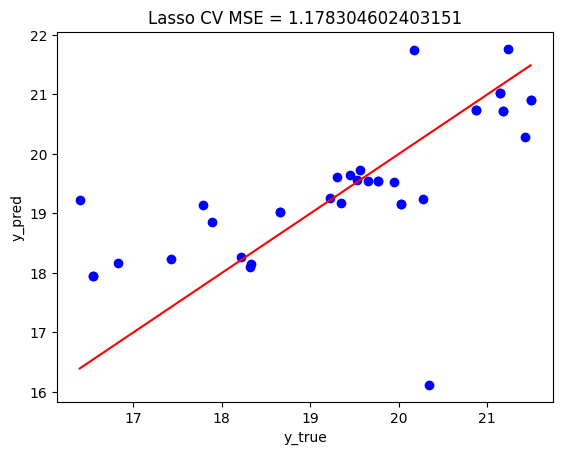

In [9]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Lasso')

# Tree

In [10]:
tree = DecisionTreeRegressor()
params = {
    'max_depth': [2, 3, 5, 7, 9, 11],
    'min_samples_leaf':[1, 2]
}

grid = GridSearchCV(tree, params, cv=lo.split(X), scoring='neg_mean_squared_error', verbose=10)
grid.fit(X, y)

Fitting 37 folds for each of 12 candidates, totalling 444 fits
[CV 1/37; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 1/37; 1/12] END max_depth=2, min_samples_leaf=1;, score=-1.354 total time=   0.0s
[CV 2/37; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 2/37; 1/12] END max_depth=2, min_samples_leaf=1;, score=-1.074 total time=   0.0s
[CV 3/37; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 3/37; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.714 total time=   0.0s
[CV 4/37; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 4/37; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.353 total time=   0.0s
[CV 5/37; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 5/37; 1/12] END max_depth=2, min_samples_leaf=1;, score=-0.163 total time=   0.0s
[CV 6/37; 1/12] START max_depth=2, min_samples_leaf=1...........................
[CV 6/37; 1/12] END m

[CV 26/37; 5/12] END max_depth=5, min_samples_leaf=1;, score=-0.892 total time=   0.0s
[CV 27/37; 5/12] START max_depth=5, min_samples_leaf=1..........................
[CV 27/37; 5/12] END max_depth=5, min_samples_leaf=1;, score=-0.013 total time=   0.0s
[CV 28/37; 5/12] START max_depth=5, min_samples_leaf=1..........................
[CV 28/37; 5/12] END max_depth=5, min_samples_leaf=1;, score=-0.011 total time=   0.0s
[CV 29/37; 5/12] START max_depth=5, min_samples_leaf=1..........................
[CV 29/37; 5/12] END max_depth=5, min_samples_leaf=1;, score=-0.013 total time=   0.0s
[CV 30/37; 5/12] START max_depth=5, min_samples_leaf=1..........................
[CV 30/37; 5/12] END max_depth=5, min_samples_leaf=1;, score=-0.000 total time=   0.0s
[CV 31/37; 5/12] START max_depth=5, min_samples_leaf=1..........................
[CV 31/37; 5/12] END max_depth=5, min_samples_leaf=1;, score=-0.090 total time=   0.0s
[CV 32/37; 5/12] START max_depth=5, min_samples_leaf=1...................

[CV 10/37; 10/12] END max_depth=9, min_samples_leaf=2;, score=-0.076 total time=   0.0s
[CV 11/37; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 11/37; 10/12] END max_depth=9, min_samples_leaf=2;, score=-0.001 total time=   0.0s
[CV 12/37; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 12/37; 10/12] END max_depth=9, min_samples_leaf=2;, score=-0.063 total time=   0.0s
[CV 13/37; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 13/37; 10/12] END max_depth=9, min_samples_leaf=2;, score=-0.046 total time=   0.0s
[CV 14/37; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 14/37; 10/12] END max_depth=9, min_samples_leaf=2;, score=-0.123 total time=   0.0s
[CV 15/37; 10/12] START max_depth=9, min_samples_leaf=2.........................
[CV 15/37; 10/12] END max_depth=9, min_samples_leaf=2;, score=-14.367 total time=   0.0s
[CV 16/37; 10/12] START max_depth=9, min_samples_leaf=2...........

GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x0000020D3896C7B0>,
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2]},
             scoring='neg_mean_squared_error', verbose=10)

In [11]:
grid.best_params_

{'max_depth': 7, 'min_samples_leaf': 1}

In [ ]:
# Uncomment to get model
# tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=1)

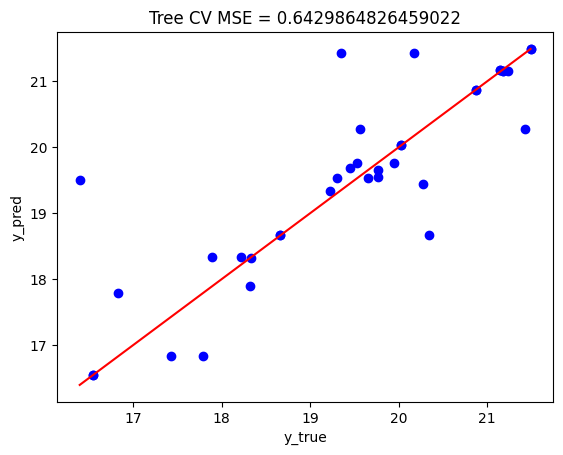

In [12]:
cross_validate_and_plot(grid.best_estimator_, X, y, cv=lo, metric=mse, title='Tree')

# RF

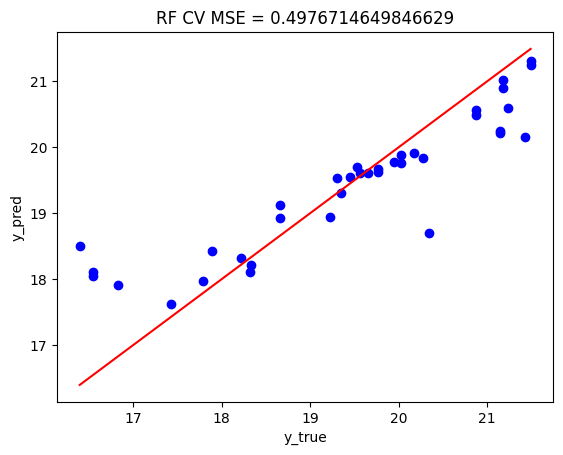

In [13]:
rf = RandomForestRegressor(random_state=42)
cross_validate_and_plot(rf, X, y, cv=lo, metric=mse, title='RF')

# CB

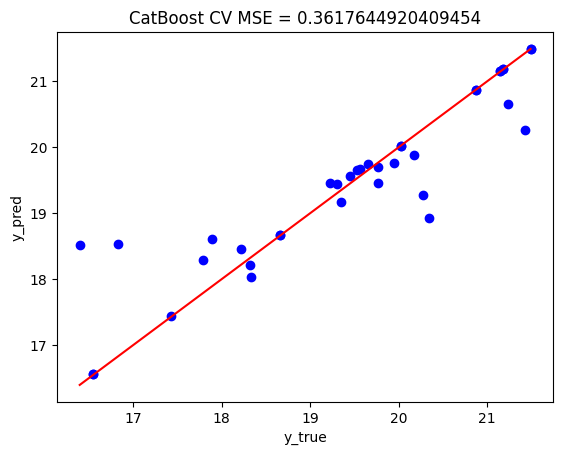

In [17]:
cb = CatBoostRegressor(verbose=0)
cross_validate_and_plot(cb, X, y, cv=lo, metric=mse, title='CatBoost')

In [18]:
cb = CatBoostRegressor(verbose=0)
cb.fit(X, y)

In [19]:
dump(cb, 'cb_nd_m7c3_d101.joblib')

['cb_nd_m7c3_d101.joblib']